<a href="https://colab.research.google.com/github/Rajrel/Deeplearning_Pytorch/blob/main/basicneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)-->
  #Hidden layer 1 (num of neurons) -->
  # H2(n)
  # output (3 classes of Iris flowers)

  def __init__(self,in_features=4, h1=8, h2 = 9 , out_features = 3):
    super().__init__() # instantiate the nn.model
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x =self.out(x)

    return x


In [ ]:
# Pick a manual seed
torch.manual_seed(81)

# create an instance of model
model = Model()

# This is the model for identifying iris flowers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
mydf = pd.read_csv(url)


In [ ]:
mydf.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
mydf["variety"] = pd.Categorical(mydf["variety"]).codes

In [ ]:
# Train, Test, Split X,y
X = mydf.drop("variety", axis = 1).values
y = mydf["variety"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split (X,y, test_size = .2, random_state = 81, shuffle = True)

In [ ]:
# Convert X features to Tensors
X_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(x_test)

In [ ]:
# Convert y labels to tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer/Set Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [ ]:
# Train out model
# Epoch (one run throuh all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  i+=1
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'epoch: {i:2} loss: {loss.item():10.8f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 10 loss: 0.89653516
epoch: 20 loss: 0.61455739
epoch: 30 loss: 0.44563347
epoch: 40 loss: 0.33297247
epoch: 50 loss: 0.22402902
epoch: 60 loss: 0.14680775
epoch: 70 loss: 0.10908192
epoch: 80 loss: 0.09132046
epoch: 90 loss: 0.08198334
epoch: 100 loss: 0.07644740


Text(0.5, 0, 'Epoch')

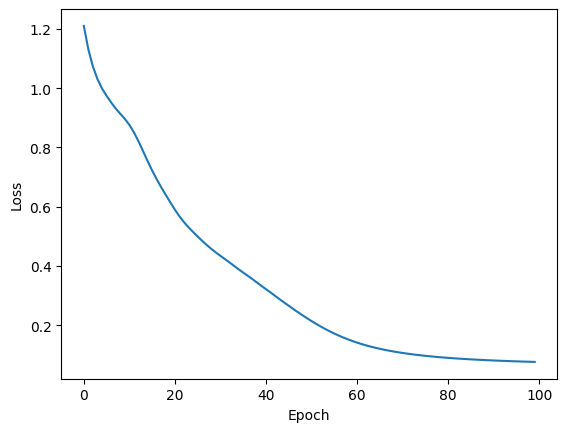

In [ ]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # Turn off backpropagation
  y_eval = model.forward(x_test) # features from test set
  loss = criterion(y_eval, y_test) # labels from test set
  print(f'Loss: {loss}')


Loss: 0.011723695322871208


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x= 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    print(f'{i+1:2}. {str(y_val):38} \t {x} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
        correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}%')

 1. tensor([-9.2902,  5.6270, 10.3718])    	 Virginica 	 2
 2. tensor([ 11.4118,   4.4681, -17.7204]) 	 Setosa 	 0
 3. tensor([-8.8249,  5.1890,  9.9098])    	 Virginica 	 2
 4. tensor([-2.5770,  5.1439,  0.1356])    	 Versicolor 	 1
 5. tensor([  9.2834,   3.6678, -14.4851]) 	 Setosa 	 0
 6. tensor([  9.0029,   3.9093, -14.6450]) 	 Setosa 	 0
 7. tensor([-3.4178,  4.6513,  1.7768])    	 Versicolor 	 1
 8. tensor([ 10.1085,   4.0544, -15.8859]) 	 Setosa 	 0
 9. tensor([-7.3476,  4.7361,  7.9241])    	 Virginica 	 2
10. tensor([  9.9194,   4.1075, -15.8118]) 	 Setosa 	 0
11. tensor([-0.7511,  4.6101, -2.3954])    	 Versicolor 	 1
12. tensor([ 0.0497,  4.0759, -3.3019])    	 Versicolor 	 1
13. tensor([-13.2293,   5.1084,  16.9234]) 	 Virginica 	 2
14. tensor([-6.8071,  4.5739,  7.0940])    	 Virginica 	 2
15. tensor([ 10.0148,   4.0864, -15.8505]) 	 Setosa 	 0
16. tensor([-9.0747,  4.7034, 10.6110])    	 Virginica 	 2
17. tensor([ 10.2417,   4.2997, -16.4223]) 	 Setosa 	 0
18. tensor([ 1

In [ ]:
# Evaluate New Data on the network
new_iris = torch.tensor([5.9,	3.0,	5.1,	1.8	])

with torch.no_grad():
  y_val = model.forward (new_iris)
  print(y_val.argmax().item())

2


In [ ]:
# Save our NN model
torch.save(model.state_dict(), 'iris_model.pt')



In [ ]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
# make Sure the model loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)